In [ ]:
  # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/Boston.csv


In [ ]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/kaggle/input/boston-housing-dataset/Boston.csv')

In [ ]:
data.shape

(506, 14)

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
data.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

### Observation:
### --> Most of them have a correlation of around + or - 0.5 with the target variable

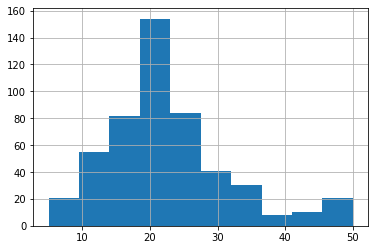

In [ ]:
data['medv'].hist()

# Remove Outliers

In [ ]:
((data['medv']>=(data['medv'].mean() - 3 * data['medv'].std())) \
                          & (data['medv']<=(data['medv'].mean() + 3 * data['medv'].std()))).sum()

506

### --> All the points are within the outlier limit

In [ ]:
X = data.drop('medv',axis = 1)
y = data['medv']

# Check multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [ ]:
X_drop_1 = X.drop(['nox','rm','tax','ptratio','age','black'],axis = 1)

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_drop_1.values, i) for i in range(X_drop_1.shape[1])]
vif["features"] = X_drop_1.columns

vif

,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


### --> Multi-collinearity is required from statistical point of view but not from accuracy point of view.
### --> We will ignore handling multi-collinearity for now.


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3, test_size = 0.3)

In [ ]:
X_train.shape

(354, 13)

# Removing influence points

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train,X_train)
regr = model.fit()

In [ ]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              636.1
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                   4.75e-230
Time:                        05:57:57   Log-Likelihood:                         -1062.7
No. Observations:                 354   AIC:                                      2151.
Df Residuals:                     341   BIC:                                      2202.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1298      0.037     -3.471      0.001      -0.203      -0.056
zn             0.0479      0.018      2.696      0.007       0.013       0.083
indus         -0.0647      0.078     -0.828      0.408      -0.218       0.089
chas           3.9233      1.062      3.693      0.000       1.834       6.013
nox           -0.2740      3.927     -0.070      0.944      -7.999       7.451
rm             5.4133      0.372     14.563      0.000       4.682       6.145
age            0.0015      0.017      0.088      0.930      -0.031       0.034
dis           -0.8123      0.225     -3.618      0.000      -1.254      -0.371
rad            0.1847      0.078      2.367      0.019       0.031       0.338
tax           -0.0057      0.005     -1.220      0.223      -0.015       0.003
ptratio       -0.3981      0.134     -2.969      0.003      -0.662      -0.134
black          0.0173      0.003      5.349      0.000       0.011       0.024
lstat         -0.4865      0.062     -7.878      0.000      -0.608      -0.365
==============================================================================
Omnibus:                      142.244   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.640
Skew:                           1.606   Prob(JB):                    8.33e-170
Kurtosis:                       9.517   Cond. No.                     8.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

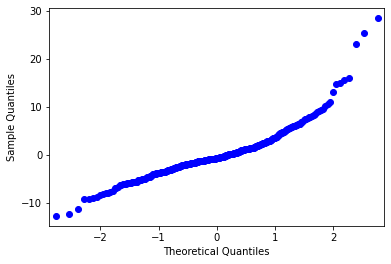

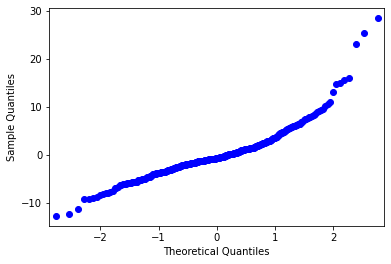

In [ ]:
#qqpolot vs. normal distribution
sm.qqplot(regr.resid)

### --> Normality of errors is also required from statistical inference point of view

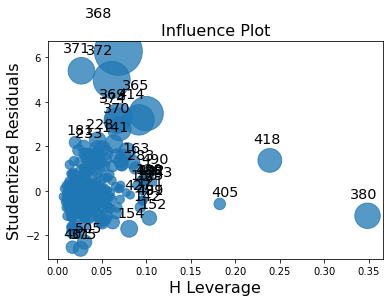

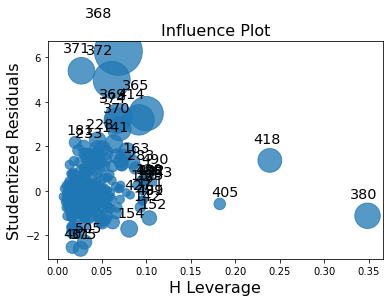

In [ ]:
#graphical representation of the influences()
sm.graphics.influence_plot(regr)

### --> There are quite a few influence points

# Influence points based on outlier criteria

In [ ]:
regr.outlier_test()

,student_resid,unadj_p,bonf(p)
359,0.033368,0.973400,1.000000
374,3.155229,0.001747,0.618404
98,1.618956,0.106384,1.000000
273,-0.552729,0.580812,1.000000
329,-0.334445,0.738250,1.000000
...,...,...,...
440,-0.815449,0.415386,1.000000
131,-0.392208,0.695150,1.000000
249,0.041243,0.967127,1.000000
152,-1.223930,0.221826,1.000000


In [ ]:
(regr.outlier_test()['student_resid'] > 3).sum()

7

In [ ]:
(regr.outlier_test()['student_resid'] < -3).sum()

0

In [ ]:
outlier_upp = regr.outlier_test()['student_resid'] > 3

In [ ]:
outlier_low = regr.outlier_test()['student_resid'] < -3

In [ ]:
outlier = np.logical_or(outlier_low, outlier_upp)

# Influence points based on Leverage Statistic

In [ ]:
infl = regr.get_influence()
infl

In [ ]:
leviers = infl.hat_matrix_diag #leverage
leviers[:10]

array([0.02900116, 0.0668746 , 0.03593382, 0.05134291, 0.05648497,
       0.02588316, 0.07417012, 0.02763276, 0.06873466, 0.0158589 ])

In [ ]:
high_lev = leviers>0.08

In [ ]:
influ_pts = np.logical_or(outlier, high_lev)

In [ ]:
influ_index = X_train.index[influ_pts]

In [ ]:
X_train = X_train.drop(influ_index)

In [ ]:
y_train = y_train.drop(influ_index)

In [ ]:
model = sm.OLS(y_train,X_train)
regr = model.fit()

In [ ]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              993.3
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                   3.63e-246
Time:                        05:58:01   Log-Likelihood:                         -894.10
No. Observations:                 327   AIC:                                      1814.
Df Residuals:                     314   BIC:                                      1863.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2177      0.066     -3.283      0.001      -0.348      -0.087
zn             0.0228      0.014      1.572      0.117      -0.006       0.051
indus         -0.0702      0.074     -0.952      0.342      -0.215       0.075
chas           2.3986      0.938      2.556      0.011       0.552       4.245
nox           -0.6833      3.534     -0.193      0.847      -7.636       6.269
rm             6.5219      0.319     20.477      0.000       5.895       7.149
age           -0.0315      0.013     -2.390      0.017      -0.058      -0.006
dis           -0.7927      0.181     -4.369      0.000      -1.150      -0.436
rad            0.1885      0.082      2.311      0.021       0.028       0.349
tax           -0.0089      0.005     -1.832      0.068      -0.018       0.001
ptratio       -0.6905      0.108     -6.404      0.000      -0.903      -0.478
black          0.0158      0.003      5.934      0.000       0.011       0.021
lstat         -0.2646      0.056     -4.714      0.000      -0.375      -0.154
==============================================================================
Omnibus:                       59.778   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.650
Skew:                           0.893   Prob(JB):                     1.74e-31
Kurtosis:                       5.684   Cond. No.                     9.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

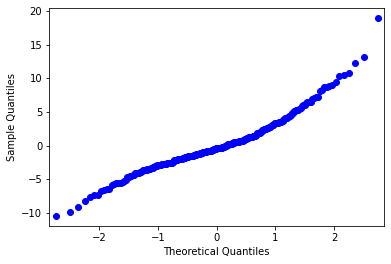

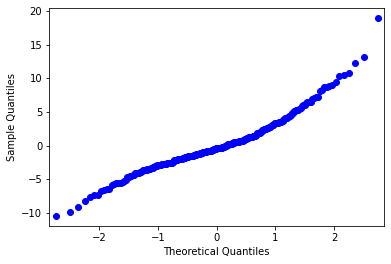

In [ ]:
#qqpolot vs. normal distribution
sm.qqplot(regr.resid)

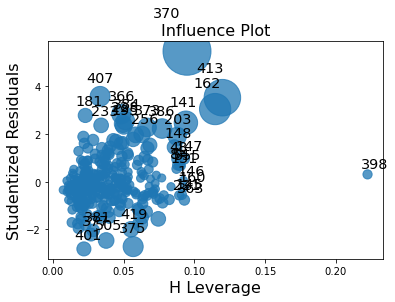

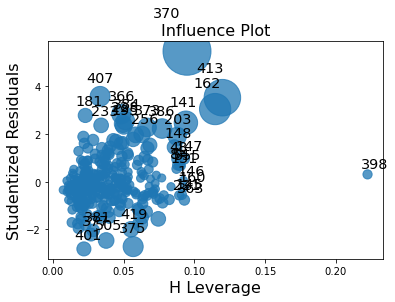

In [ ]:
#graphical representation of the influences()
sm.graphics.influence_plot(regr)

# Best Subset Selection

In [ ]:
import itertools

In [ ]:
import time

In [ ]:
import statsmodels.api as sm
from sklearn.base import BaseEstimator, RegressorMixin

class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)

In [ ]:
from sklearn.model_selection import cross_val_score

### Function to build model using CV

In [ ]:
def processSubsetCV(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    w_model = SMWrapper(sm.OLS)
    scores = cross_val_score(w_model, X_train[list(feature_set)], y_train, cv=5, scoring = 'neg_mean_squared_error')
    print(scores.mean())
#     regr = model.fit()
#     RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"neg_MSE":scores.mean(),"STD": scores.std(),"features": model.exog_names}

### Function to produce combinations of features for a given number of features

In [ ]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubsetCV(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    print(models)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['neg_MSE'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

### Get best model from each number of features

In [ ]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["neg_MSE", "STD","features"])

tic = time.time()
for i in range(1,X_train.shape[1]+1):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

In [ ]:
models_best

,neg_MSE,STD,features
1,-31.291865,6.382370,[lstat]
2,-21.915286,3.106106,"[rm, lstat]"
3,-18.442613,3.638025,"[rm, ptratio, lstat]"
4,-17.231326,3.341615,"[rm, ptratio, black, lstat]"
5,-16.883744,3.057542,"[chas, rm, ptratio, black, lstat]"
6,-16.668975,3.148401,"[nox, rm, dis, ptratio, black, lstat]"
7,-16.326722,3.045583,"[indus, chas, rm, dis, ptratio, black, lstat]"
8,-16.023494,3.160353,"[indus, chas, rm, age, dis, ptratio, black, ls..."
9,-15.821308,3.543665,"[crim, indus, chas, rm, age, dis, ptratio, bla..."
10,-15.806489,3.524691,"[crim, indus, chas, nox, rm, age, dis, ptratio..."


### Train model on the complete X_train using all the features

In [ ]:
model_13f_ = sm.OLS(y_train,X_train)
model_13f = model_13f_.fit()

In [ ]:
model_13f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              993.3
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                   3.63e-246
Time:                        06:06:20   Log-Likelihood:                         -894.10
No. Observations:                 327   AIC:                                      1814.
Df Residuals:                     314   BIC:                                      1863.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2177      0.066     -3.283      0.001      -0.348      -0.087
zn             0.0228      0.014      1.572      0.117      -0.006       0.051
indus         -0.0702      0.074     -0.952      0.342      -0.215       0.075
chas           2.3986      0.938      2.556      0.011       0.552       4.245
nox           -0.6833      3.534     -0.193      0.847      -7.636       6.269
rm             6.5219      0.319     20.477      0.000       5.895       7.149
age           -0.0315      0.013     -2.390      0.017      -0.058      -0.006
dis           -0.7927      0.181     -4.369      0.000      -1.150      -0.436
rad            0.1885      0.082      2.311      0.021       0.028       0.349
tax           -0.0089      0.005     -1.832      0.068      -0.018       0.001
ptratio       -0.6905      0.108     -6.404      0.000      -0.903      -0.478
black          0.0158      0.003      5.934      0.000       0.011       0.021
lstat         -0.2646      0.056     -4.714      0.000      -0.375      -0.154
==============================================================================
Omnibus:                       59.778   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.650
Skew:                           0.893   Prob(JB):                     1.74e-31
Kurtosis:                       5.684   Cond. No.                     9.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
((model_13f.predict(X_test) - y_test) ** 2).mean()

26.12638550815927

In [ ]:
np.sqrt(((model_13f.predict(X_test) - y_test) ** 2).mean())

5.111397608106737

In [ ]:
np.sqrt(((model_13f.predict(X_test) - y_test) ** 2).mean())/y_test.mean()

0.22912953769972397

### Train model on the complete X_train using best subset of features

In [ ]:
model_12f_ = sm.OLS(y_train,X_train[models_best.loc[12,'features']])
model_12f = model_12f_.fit()

In [ ]:
model_12f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1071.
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                   3.71e-247
Time:                        06:06:20   Log-Likelihood:                         -895.38
No. Observations:                 327   AIC:                                      1815.
Df Residuals:                     315   BIC:                                      1860.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.2056      0.066     -3.114      0.002      -0.335      -0.076
indus         -0.0981      0.072     -1.368      0.172      -0.239       0.043
chas           2.4540      0.940      2.611      0.009       0.605       4.303
nox           -0.7203      3.542     -0.203      0.839      -7.689       6.248
rm             6.6429      0.310     21.442      0.000       6.033       7.252
age           -0.0349      0.013     -2.673      0.008      -0.061      -0.009
dis           -0.6933      0.170     -4.067      0.000      -1.029      -0.358
rad            0.1602      0.080      2.009      0.045       0.003       0.317
tax           -0.0064      0.005     -1.395      0.164      -0.016       0.003
ptratio       -0.7555      0.100     -7.569      0.000      -0.952      -0.559
black          0.0159      0.003      5.933      0.000       0.011       0.021
lstat         -0.2611      0.056     -4.644      0.000      -0.372      -0.150
==============================================================================
Omnibus:                       62.875   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.001
Skew:                           0.936   Prob(JB):                     2.68e-33
Kurtosis:                       5.740   Cond. No.                     9.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
((model_12f.predict(X_test[models_best.loc[12,'features']]) - y_test) ** 2).mean()

26.54281834858001

In [ ]:
np.sqrt(((model_12f.predict(X_test[models_best.loc[12,'features']]) - y_test) ** 2).mean())

5.151972277543815

In [ ]:
np.sqrt(((model_12f.predict(X_test[models_best.loc[12,'features']]) - y_test) ** 2).mean())/y_test.mean()

0.23094838568675827

# Ridge Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge(normalize = True)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
ridge_regressor.best_estimator_

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_regressor = Ridge(alpha = 0.01, normalize = True)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [ ]:
coef_vals = np.hstack((np.array(X_train.columns).reshape(-1,1),(ridge_regressor.coef_).reshape(-1,1)))

In [ ]:
pd.DataFrame(coef_vals, columns = ['features','coefs'])

,features,coefs
0,crim,-0.203141
1,zn,0.0213259
2,indus,-0.0834707
3,chas,2.40583
4,nox,-4.06166
5,rm,5.82434
6,age,-0.0278983
7,dis,-0.890688
8,rad,0.194037
9,tax,-0.00828653


In [ ]:
((ridge_regressor.predict(X_test) - y_test) ** 2).mean()

24.122906054699943

In [ ]:
np.sqrt(((ridge_regressor.predict(X_test) - y_test) ** 2).mean())

4.911507513452458

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(normalize = True, )

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_regressor.best_estimator_

Lasso(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_regressor = Lasso(alpha = 0.001, normalize = True)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
coef_vals = np.hstack((np.array(X_train.columns).reshape(-1,1),(lasso_regressor.coef_).reshape(-1,1)))

In [ ]:
pd.DataFrame(coef_vals, columns = ['features','coefs'])

,features,coefs
0,crim,-0.196684
1,zn,0.0197557
2,indus,-0.0789172
3,chas,2.35052
4,nox,-3.68466
5,rm,5.89747
6,age,-0.0275589
7,dis,-0.861282
8,rad,0.182749
9,tax,-0.00797674


In [ ]:
((lasso_regressor.predict(X_test) - y_test) ** 2).mean()

24.14682891557918

In [ ]:
np.sqrt(((lasso_regressor.predict(X_test) - y_test) ** 2).mean())

4.913942298763711

In [ ]:
pd.DataFrame({'models':['LR_13ftrs','LR_12ftrs','Ridge','Lasso'],'MSE':[18.24,18.23,19.79,19.83]})

,models,MSE
0,LR_13ftrs,18.24
1,LR_12ftrs,18.23
2,Ridge,19.79
3,Lasso,19.83


### From the above results:
### --> There is no significant difference in the MSE
### --> Regularized models tend to perform worse than Linear Regression
### --> This implies that though the bias has been increased, there is no substantial reduction in variance

# Lets check the plot of predicted values vs residuals

In [ ]:
y_preds = model_12f.predict(X_train[models_best.loc[12,'features']])

In [ ]:
residuals = model_12f.resid

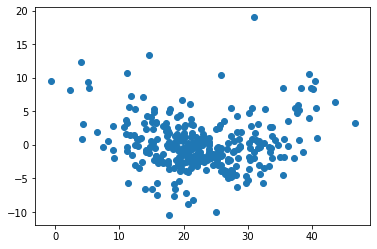

In [ ]:
plt.scatter(y_preds, residuals)

### --> We can see a non linear pattern. We can try with polynomial regression and splines.

# Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression

### Function to build model on the given features

In [ ]:
def processSubsetCV(feature_set,l):

    X_train_subset = copy.deepcopy(X_train[list(feature_set)])
    poly_X_train_subset = np.hstack((X_train_subset**(i+1) for i in range(l)))

    lr_model = LinearRegression()

    scores = cross_val_score(lr_model, poly_X_train_subset, y_train, cv=5, scoring = 'neg_mean_squared_error')
    print(scores.mean())
#     regr = model.fit()
#     RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"neg_MSE":scores.mean(),"STD": scores.std(),"features": list(feature_set),"degree": l}

### Function to generate combination of features for a give number of features

In [ ]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X_train.columns, k):
        for l in range(2,5):
              results.append(processSubsetCV(combo,l))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    print(models)
    
    # Choose the model with the lowest RSS
    best_model = models.loc[models['neg_MSE'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

### Get the best model for each number of features

In [ ]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["neg_MSE", "STD","features","degree"])

tic = time.time()
for i in range(1,X_train.shape[1]+1):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

In [ ]:
models_best

### Train the model on complete X_train with all the features

In [ ]:
poly_X_train = np.hstack((X_train**(i+1) for i in range(2)))

In [ ]:
model_13f_ = sm.OLS(y_train,poly_X_train)
model_13f = model_13f_.fit()

In [ ]:
model_13f.summary()

### Train the model on the complete X_train with best subset of features

In [ ]:
poly_X_test = np.hstack((X_test**(i+1) for i in range(2)))

In [ ]:
((model_13f.predict(poly_X_test) - y_test) ** 2).mean()

In [ ]:
X_train_subset = copy.deepcopy(X_train[models_best.loc[12,'features']])
poly_X_train_subset = np.hstack((X_train_subset**(i+1) for i in range(2)))

In [ ]:
model_12f_ = sm.OLS(y_train,poly_X_train_subset)
model_12f = model_12f_.fit()

In [ ]:
X_test_subset = copy.deepcopy(X_test[models_best.loc[12,'features']])
poly_X_test_subset = np.hstack((X_test_subset**(i+1) for i in range(2)))

In [ ]:
((model_12f.predict(poly_X_test_subset) - y_test) ** 2).mean()